In [2]:
import prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#verinin okunması
path =  'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)

In [4]:
print(df.head())
print(df.info())
print(df.shape)

     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
None
(108, 2)


In [5]:
arr = np.array(df['Sales'], dtype=np.uint32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


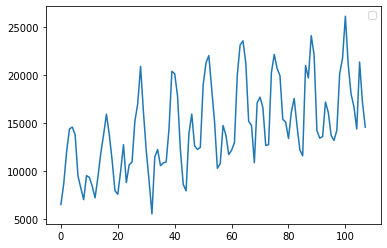

In [6]:
plt.plot(arr)
plt.legend()
plt.show()

In [7]:
from matplotlib import pyplot

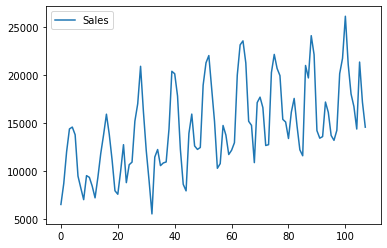

In [8]:
df.plot()
pyplot.legend()
pyplot.show()

In [9]:
df.dtypes

Month    object
Sales     int64
dtype: object

In [10]:
# veri dönüşümü yapmamız gerekicek
'''
prophet kütüphanesi ilk sutunu ds yani zaman değişkeni, 
ikinci sutun ise y yani tahmin edilecek değer olmalidir.
'''
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [11]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [12]:
# model oluşturma süreci
from prophet import Prophet
model = Prophet()

model.fit(df)

09:53:21 - cmdstanpy - INFO - Chain [1] start processing
09:53:21 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# tahminin yapılması

future = list()
#1968 yılının her ayını tahmin etmek için bir liste oluşturuldu
for i in range(1,13):
    date = '1968-%02d' % i
    future.append([date])

# model için, veri tipi ve sütün isimi değiştirildi
future = pd.DataFrame(future)
future.columns=['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [14]:
forecast = model.predict(future)

In [15]:
'''
ds: tahinin tarih ve saat
yhat: tahmin değeri
yhat_lower,yhat_upper: tahimnedilen değerin üzerinde alt ve üst sinirlaridir
'''


forecast[['ds','yhat','yhat_lower','yhat_upper']].head(15)

,ds,yhat,yhat_lower,yhat_upper
0,1968-01-01,14353.439034,12694.378428,15786.498000
1,1968-02-01,14925.977696,13305.857787,16547.966038
2,1968-03-01,20870.250918,19300.746700,22435.007889
3,1968-04-01,22890.674553,21190.375911,24375.350805
4,1968-05-01,24192.852456,22581.210037,25916.492544
5,1968-06-01,21076.656524,19397.216433,22637.289493
6,1968-07-01,17610.295823,15979.523771,19244.728790
7,1968-08-01,15315.951665,13912.444937,16977.253176
8,1968-09-01,13746.654509,12148.933218,15357.158058
9,1968-10-01,18157.031320,16572.312714,19713.372372


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


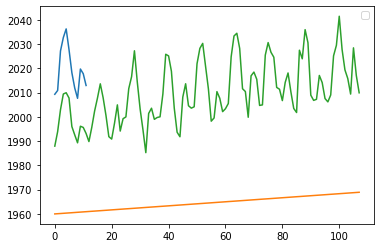

In [16]:
plt.plot(forecast['yhat'])
plt.plot(df)

plt.legend()
plt.show()

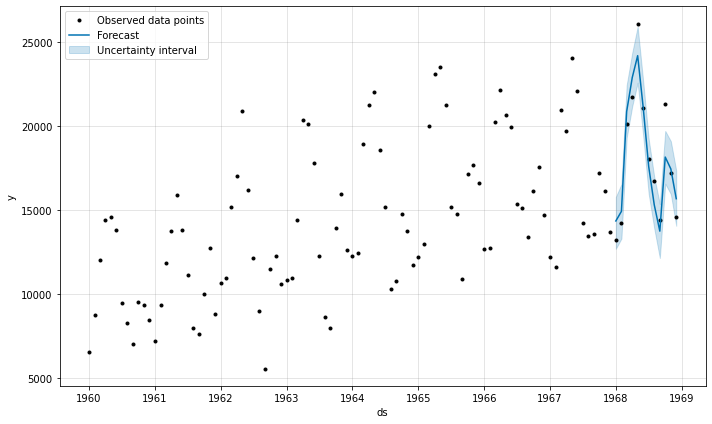

In [17]:
model.plot(forecast)
pyplot.legend()
pyplot.show()

In [18]:
#  verisetinde bulunmayan bir değeri tahmin yani önek dışı tahmin
# tahminin yapılması

future = list()
#1968 yılının her ayını tahmin etmek için bir liste oluşturuldu
for i in range(1,13):
    date = '1969-%02d' % i
    future.append([date])

# model için, veri tipi ve sütün isimi değiştirildi
future = pd.DataFrame(future)
future.columns=['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [19]:
forecast = model.predict(future)

In [20]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head(15)

,ds,yhat,yhat_lower,yhat_upper
0,1969-01-01,15405.477058,13804.515476,16948.590973
1,1969-02-01,16174.641954,14599.459906,17793.400029
2,1969-03-01,21389.335077,19903.198090,22862.577253
3,1969-04-01,23508.664294,21897.208529,25084.260749
4,1969-05-01,25016.109137,23470.215096,26632.232094
5,1969-06-01,22280.936938,20619.477126,23860.040024
6,1969-07-01,17936.588515,16287.597241,19440.804731
7,1969-08-01,15766.493270,14220.985519,17259.366504
8,1969-09-01,14270.746471,12661.926299,15786.911055
9,1969-10-01,18704.286175,17011.756805,20251.793299


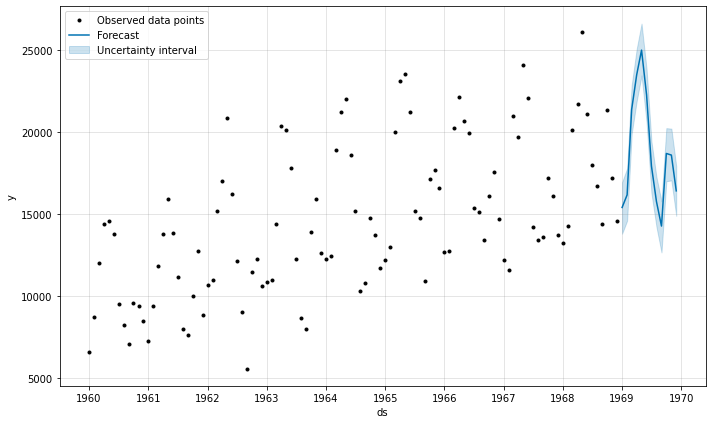

In [21]:
model.plot(forecast)
pyplot.legend()
pyplot.show()

In [27]:
'''
son 12 ayi cikartarak eğitim yapalim ve 
cikartiğimiz 12 ayin tahminini yapatikdan 
sonra hata değerlerini cikartalim
'''
path =  'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)

df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [28]:
# son 12 ayi düşürme
train= df.drop(df.index[-12:])

In [29]:
train.tail()

,ds,y
91,1967-08-01,13434
92,1967-09-01,13598
93,1967-10-01,17187
94,1967-11-01,16119
95,1967-12-01,13713


In [30]:
model = Prophet()
model.fit(train)

10:17:33 - cmdstanpy - INFO - Chain [1] start processing
10:17:34 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
future = list()

for i in range(1,13):
    date = '1968-%02d' % i
    future.append([date])

# model için, veri tipi ve sütün isimi değiştirildi
future = pd.DataFrame(future)
future.columns=['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [32]:
forecast = model.predict(future)

In [41]:
#model evolate
y_true = df['y'][-12:].values
print(y_true)

[13210 14251 20139 21725 26099 21084 18024 16722 14385 21342 17180 14577]


In [42]:
y_prep = forecast['yhat'].values
print(y_prep)

[14512.98260468 14930.90635399 20842.17924116 23000.67992676
 23350.15549433 20972.26885076 17359.54246185 14785.20647764
 13521.40433215 17058.06467785 17418.70438627 15808.94605903]


In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
mae = mean_absolute_error(y_true, y_prep)
print('MEA: %.3f' % mae)

MEA: 1336.813


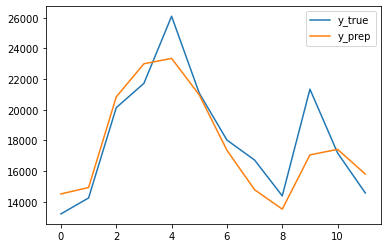

In [40]:
plt.plot(y_true, label = 'y_true')
plt.plot(y_prep, label = 'y_prep')
plt.legend()
plt.show()